In [50]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
import sklearn

#Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score

## Read the data

In [52]:
#Read the data
HEPMASS = pd.read_csv('train_new_data.csv')
print(HEPMASS.shape)

(500000, 30)


## Split the data : 80/20 for training and testing.

In [54]:

column = HEPMASS.columns

#Training data
Xtrain = HEPMASS.iloc[1:400000,:].drop(column[0:2], axis=1)
ytrain = HEPMASS[column[1]].iloc[1:400000]

#Testing data
Xtest = HEPMASS.iloc[400000:,:].drop(column[0:2], axis=1)
ytest = HEPMASS[column[1]].iloc[400000:]



In [55]:
#Preprocess the data 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest  = scaler.transform(Xtest)

In [56]:
print(Xtrain.shape)

(399999, 28)


## Neural Network

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [58]:
#-------Construct model-------------------#
model = Sequential()
model.add(Dense(units=512,
                activation='relu', input_dim=28))
model.add(Dropout(0.4))
model.add(Dense(units=384,
                activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256,
                activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,
                activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               14848     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 384)               196992    
_________________________________________________________________
dropout_7 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               98560     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [60]:
#Compile the data
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [61]:
#Train on the data
history = model.fit(
    Xtrain,
    ytrain,
    epochs=50,
    batch_size=400,
    shuffle=True,
    validation_split=0.1,
    verbose=2
)

Train on 359999 samples, validate on 40000 samples
Epoch 1/50
359999/359999 - 16s - loss: 0.1037 - accuracy: 0.8486 - val_loss: 0.0931 - val_accuracy: 0.8663
Epoch 2/50
359999/359999 - 16s - loss: 0.0951 - accuracy: 0.8619 - val_loss: 0.0915 - val_accuracy: 0.8688
Epoch 3/50
359999/359999 - 22s - loss: 0.0930 - accuracy: 0.8657 - val_loss: 0.0899 - val_accuracy: 0.8705
Epoch 4/50
359999/359999 - 17s - loss: 0.0913 - accuracy: 0.8691 - val_loss: 0.0887 - val_accuracy: 0.8739
Epoch 5/50
359999/359999 - 17s - loss: 0.0903 - accuracy: 0.8707 - val_loss: 0.0880 - val_accuracy: 0.8745
Epoch 6/50
359999/359999 - 18s - loss: 0.0894 - accuracy: 0.8722 - val_loss: 0.0873 - val_accuracy: 0.8757
Epoch 7/50
359999/359999 - 20s - loss: 0.0887 - accuracy: 0.8734 - val_loss: 0.0873 - val_accuracy: 0.8756
Epoch 8/50
359999/359999 - 18s - loss: 0.0881 - accuracy: 0.8745 - val_loss: 0.0867 - val_accuracy: 0.8774
Epoch 9/50
359999/359999 - 17s - loss: 0.0876 - accuracy: 0.8751 - val_loss: 0.0863 - val_acc

In [62]:
model_loss, model_accuracy = model.evaluate(
    Xtest, ytest, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

100000/100000 - 4s - loss: 0.0858 - accuracy: 0.8778
Loss: 0.08581883184373379, Accuracy: 0.8778300285339355


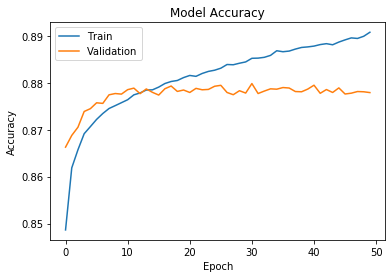

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

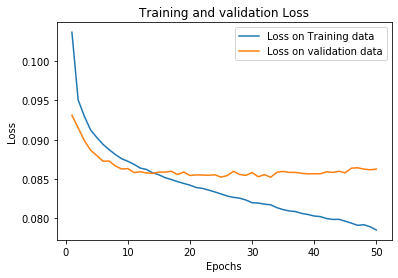

In [64]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,label = 'Loss on Training data')
plt.plot(epochs, validation_loss,label = 'Loss on validation data')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[[42291  7447]
 [ 4770 45492]]


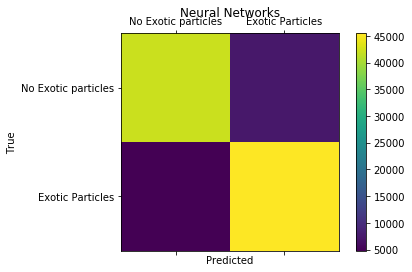

In [65]:
prediction = model.predict(Xtest)
labels = ['No Exotic particles','Exotic Particles']
conf_mat = confusion_matrix(ytest,prediction>0.5)
print(conf_mat)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Neural Networks')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Precision = TP/(TP+FP) : Proportion of correctly classified reactions where exotic particles were not generated as compared to the predicted number of positives

In [66]:
Precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
print(Precision)

0.8502754433230126


### Recall  = TP/(TP+FN) : Proportion of correctly classified  reactions where exotic particles were not generated as compared to the actual number of positives

In [67]:
Recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print(Recall)

0.8986421877988143


## Decision Tree

In [68]:
#Decsion tree
from sklearn import tree

#Train Decision tree
dec_tree = sklearn.tree.DecisionTreeClassifier(max_leaf_nodes=7000, max_depth=15)
dec_tree.fit(Xtrain,ytrain)

#Prediction using decision tree
dec_tree_predict = dec_tree.predict(Xtest)
dec_tree_predict_train = dec_tree.predict(Xtrain)

### Accuracy for decision tree

In [69]:
#Results for Decision tree

#Training data
print('Train Accuracy: ', sklearn.metrics.accuracy_score(ytrain, dec_tree_predict_train))
print("Confusion Matrix")
print(confusion_matrix(ytrain, dec_tree_predict_train))
print('\n')

#Testing data
dec_conf_mat = confusion_matrix(ytest, dec_tree_predict) 
print('Test Accuraccy: ', sklearn.metrics.accuracy_score(ytest, dec_tree_predict))
print("Confusion Matrix")
print(dec_conf_mat)
print('\n')

Train Accuracy:  0.9074022685056713
Confusion Matrix
[[177134  22842]
 [ 14197 185826]]


Test Accuraccy:  0.84571
Confusion Matrix
[[40919  8819]
 [ 6610 43652]]




### Confusion matrix Analysis for Decision trees

[[40919  8819]
 [ 6610 43652]]


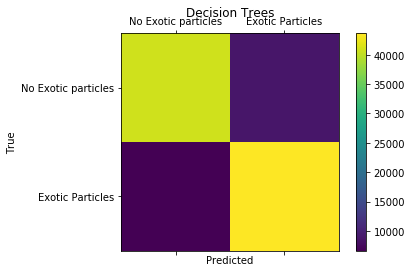

Precision 0.8226909003176646
Recall 0.8609270129815481


In [71]:
print(dec_conf_mat)

labels = ['No Exotic particles','Exotic Particles']

fig = plt.figure()
ax = fig.add_subplot(111)
dec_cax = ax.matshow(dec_conf_mat)
plt.title('Confusion matrix')
fig.colorbar(dec_cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.title('Decision Trees')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Precision = TP/(TP+FP) : Proportion of correctly classified reactions where exotic particles were not generated as compared to the predicted number of positives

dec_Precision = dec_conf_mat[0][0]/(dec_conf_mat[0][0]+dec_conf_mat[0][1])
print("Precision "+str(dec_Precision))

### Recall  = TP/(TP+FN) : Proportion of correctly classified  reactions where exotic particles were not generated as compared to the actual number of positives

dec_Recall = dec_conf_mat[0][0]/(dec_conf_mat[0][0]+dec_conf_mat[1][0])
print("Recall "+str(dec_Recall))

## Random Forest

In [45]:
#Random Forest 
from sklearn import ensemble
rfclassifier = sklearn.ensemble.RandomForestClassifier(max_depth=15, n_estimators=150, max_leaf_nodes=10000) 

#Train Random Forest
rfclassifier.fit(Xtrain,ytrain)

#Predict on Random Forest
rfclassifier_predict = rfclassifier.predict(Xtest)
rfclassifier_predict_train = rfclassifier.predict(Xtrain)

### Accuracy for Random Forest

In [46]:
#Results for Random Forest

#Training data
print('Train Accuracy: ', sklearn.metrics.accuracy_score(ytrain, rfclassifier_predict_train))
print("Confusion Matrix for training data")
print(confusion_matrix(ytrain, rfclassifier_predict_train))
print('\n')

#Testing data
rfclassifier_conf_mat = confusion_matrix(ytest, rfclassifier_predict)
print('Test Accuraccy: ', sklearn.metrics.accuracy_score(ytest, rfclassifier_predict))
print("Confusion Matrix for testing data")
print(rfclassifier_conf_mat)
print('\n')


Train Accuracy:  0.9126872817182043
Confusion Matrix for training data
[[179619  20357]
 [ 14568 185455]]


Test Accuraccy:  0.8614
Confusion Matrix for testing data
[[41578  8160]
 [ 5700 44562]]




### Confusion Matrix for Random Forest

[[41578  8160]
 [ 5700 44562]]


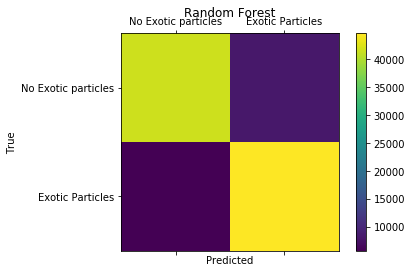

Precision0.8359403273151312
Recall0.8794365243876644


In [47]:
print(rfclassifier_conf_mat)

labels = ['No Exotic particles','Exotic Particles']

fig = plt.figure()
ax = fig.add_subplot(111)
rfclassifier_cax = ax.matshow(rfclassifier_conf_mat)
plt.title('Random Forest')
fig.colorbar(rfclassifier_cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Precision = TP/(TP+FP) : Proportion of correctly classified reactions where exotic particles were not generated as compared to the predicted number of positives

rfclassifier_Precision = rfclassifier_conf_mat[0][0]/(rfclassifier_conf_mat[0][0]+rfclassifier_conf_mat[0][1])
print("Precision"+ str(rfclassifier_Precision))

### Recall  = TP/(TP+FN) : Proportion of correctly classified  reactions where exotic particles were not generated as compared to the actual number of positives

rfclassifier_Recall = rfclassifier_conf_mat[0][0]/(rfclassifier_conf_mat[0][0]+rfclassifier_conf_mat[1][0])
print("Recall"+str(rfclassifier_Recall))